# Data representation on graduates rate across Singapore Universities

## General introduction:

#### In this project, I am analysing the employment rate and the basic monthy salary of fresh graduates across university in Singapore. The Graduate Employment Survey is jointly conducted by NTU, NUS, SMU, SIT, SUTD and SUSS. This survey is done annually to survey the employment numbers of graduates after their final examinations. 

## Aims
 This project aims to enable the users of the final project to be able to view different data representations that explain the employment rate and the basic starting salaries of fresh graduates based on course yearly. 

## Objectives

The objective of this project utimately is to provide proper analysis and graphs of data representation. These graphs  should be able to present the employment rate of fresh-graduates and the total number of basic monthly salary, gross basic monthly salary of students from different course. Along the way, I will be retrieving data which is saved DataFrame using Pandas library. All the dataset used in this coursework is taken from data.gov.sg which is an open repository of all Singapore's public data.

## Field of interest

These data representations would be relavant to students, undergraduates, fresh graduates or those people in Singapore who would want to consider and decide which major they want to pursue in future and choose their career path. This would help for those foreign students who would want to come Singapore for studying abroad and working in singapore once they finish their studies. Singapore is a developed country so they have some policies for undergraduates such as debt-after-graduation meaning that there are a numerous of merit-based scholorship programs offered by Singapore Government which will provide full univisity funding, typically coming with stipulation that a graduate "pay it back" by working in Singapore for 2 years after their studies. It's called bonding. Furthermore, for those Singaporeans, the Government encouraged young generations by heavily subsidising their school fees and offering a variety of programs for them to choose from. 

Hence, the rate of education attainment at college level has climbed dramatically over years and those graduating at the top universities are among the most academically competitive students in the world. 

## Code Implementation

In [1]:
import bs4
import urllib
import urllib.request 
from bs4 import BeautifulSoup

import requests
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

## Web scraping

In [2]:
## Orginal source:https://data.gov.sg/dataset/graduates-from-university-first-degree-courses-by-type-of-course?view_id=fa0e401c-6251-4a15-aebc-a5f3d2c85752&resource_id=eb8b932c-503c-41e7-b513-114cffbe2338

r = requests.get('https://data.gov.sg/dataset/graduates-from-university-first-degree-courses-by-type-of-course/resource/eb8b932c-503c-41e7-b513-114cffbe2338/data').json()


In [3]:
pd.json_normalize(r)

,sort,resource_id,fields,records,limit,total,_links.start,_links.next
0,_id desc,eb8b932c-503c-41e7-b513-114cffbe2338,"[{'type': 'int4', 'id': '_id'}, {'type': 'nume...","[{'_id': 660, 'sex': 'Females', 'no_of_graduat...",2000,660,/dataset/graduates-from-university-first-degre...,/dataset/graduates-from-university-first-degre...


In [4]:
# create of table from the webscrapped data
web_df = pd.json_normalize(r['records'])

# Data cleaning
# Drop unused column '_id'
web_df = web_df.drop(columns =['_id'])
# Rename some columns 
web_df = web_df.rename(columns = {'no_of_graduates' : 'Number_of_Graduates'})
web_df = web_df.rename(columns = {'type_of_course'  : 'Type of Course'})
# Sort column index
web_df = web_df.reindex(columns= ['year', 'sex', 'Type of Course', 'Number_of_Graduates'])
# Sort by year ascending
web_df = web_df.sort_values(by = ['year'], ascending = True)
# reset index 
web_df = web_df.reset_index(drop = True)

web_df

,year,sex,Type of Course,Number_of_Graduates
0,1993,Males,Education,na
1,1993,Females,Services,na
2,1993,Females,Engineering Sciences,254
3,1993,Females,Architecture & Building,144
4,1993,Females,Information Technology,215
...,...,...,...,...
655,2014,Males,Humanities & Social Sciences,803
656,2014,Males,Applied Arts,165
657,2014,Males,Education,124
658,2014,Males,Services,135


In [5]:
web_df.dtypes

year                   object
sex                    object
Type of Course         object
Number_of_Graduates    object
dtype: object

In [6]:
web_df['Number_of_Graduates'] = web_df['Number_of_Graduates'].replace(['na'],'NaN')

In [7]:
web_df['Number_of_Graduates'] = web_df['Number_of_Graduates'].apply(pd.to_numeric, errors = 'coerce')
web_df = web_df.dropna()
print(web_df)

     year      sex                Type of Course  Number_of_Graduates
2    1993  Females          Engineering Sciences                254.0
3    1993  Females       Architecture & Building                144.0
4    1993  Females        Information Technology                215.0
5    1993  Females               Health Sciences                 40.0
6    1993  Females                     Dentistry                 11.0
..    ...      ...                           ...                  ...
655  2014    Males  Humanities & Social Sciences                803.0
656  2014    Males                  Applied Arts                165.0
657  2014    Males                     Education                124.0
658  2014    Males                      Services                135.0
659  2014  Females                      Services                219.0

[600 rows x 4 columns]


In [8]:
# Converting year and Number of graduates to np.int64 type as they were object type
web_df.Number_of_Graduates = web_df.Number_of_Graduates.astype(np.int64)

/var/folders/zw/_1qwpyys3sdcfh1hm9x5r6wh0000gn/T/ipykernel_86127/1725155895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web_df.Number_of_Graduates = web_df.Number_of_Graduates.astype(np.int64)


In [9]:
web_df.dtypes

year                   object
sex                    object
Type of Course         object
Number_of_Graduates     int64
dtype: object

In [10]:
web_df.describe()

,Number_of_Graduates
count,600.000000
mean,394.986667
std,562.393030
min,0.000000
25%,73.000000
50%,178.500000
75%,484.000000
max,3371.000000


# Importing dataset using csv file
This dataset is the base of our research as it will give us the number of graduates each year based on courses. 
We will compare a static CSV dataset against our web scrapped data to see if it's accurate

In [11]:
data = pd.read_csv('graduates-from-university-first-degree-courses-by-type-of-course.csv')
# rename some columns 
data = data.rename(columns ={'no_of_graduates' : 'Number_of_Graduates'})
data = data.rename(columns = {'type_of_course'  : 'Type of Course'})

data['Number_of_Graduates'] = data['Number_of_Graduates'].replace(['na'],'NaN')
data['Number_of_Graduates'] = data['Number_of_Graduates'].apply(pd.to_numeric, errors = 'coerce')
data = data.dropna()
print(data)

     year      sex                             Type of Course  \
2    1993    Males               Humanities & Social Sciences   
4    1993    Males                                Accountancy   
5    1993    Males                  Business & Administration   
6    1993    Males                                        Law   
7    1993    Males  Natural, Physical & Mathematical Sciences   
..    ...      ...                                        ...   
655  2014  Females                            Health Sciences   
656  2014  Females                     Information Technology   
657  2014  Females                    Architecture & Building   
658  2014  Females                       Engineering Sciences   
659  2014  Females                                   Services   

     Number_of_Graduates  
2                  481.0  
4                  295.0  
5                  282.0  
6                   92.0  
7                  404.0  
..                   ...  
655                309.0  
656

In [12]:
#converting object to integer 
data.Number_of_Graduates = data.Number_of_Graduates.astype(np.int64)

In [13]:
# converting integer to string type.
data['year'] = data['year'].apply(str)

In [14]:
data.dtypes

year                   object
sex                    object
Type of Course         object
Number_of_Graduates     int64
dtype: object

In [15]:
data.describe()

,Number_of_Graduates
count,600.000000
mean,394.986667
std,562.393030
min,0.000000
25%,73.000000
50%,178.500000
75%,484.000000
max,3371.000000


In [16]:
# check if there's a missing value
missing_values_count = data.isnull().sum()
missing_values_count[0:10]

year                   0
sex                    0
Type of Course         0
Number_of_Graduates    0
dtype: int64

## Exploratory Data Analysis.


[Text(0.5, 0, 'Genders'), Text(0, 0.5, 'Amount of Graduates')]

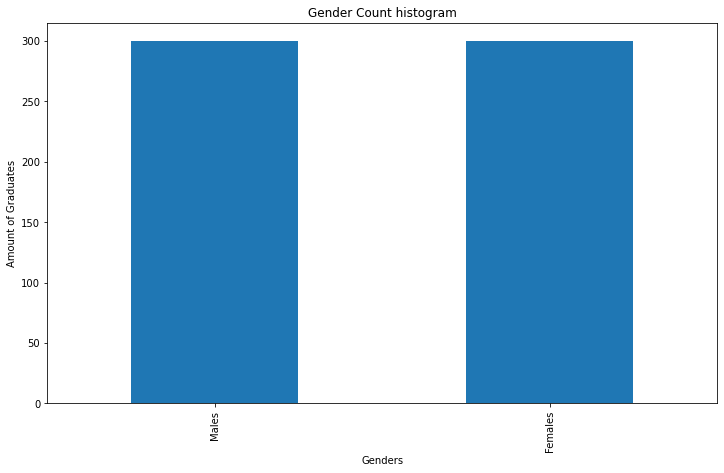

In [47]:
## How many students are males/female?

plt.figure(figsize = (12,7))
plt1 = data.sex.value_counts().plot(kind= 'bar')
plt.title('Gender Count histogram')
plt1.set(xlabel = 'Genders', ylabel = 'Amount of Graduates')

/Users/lanchipham/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


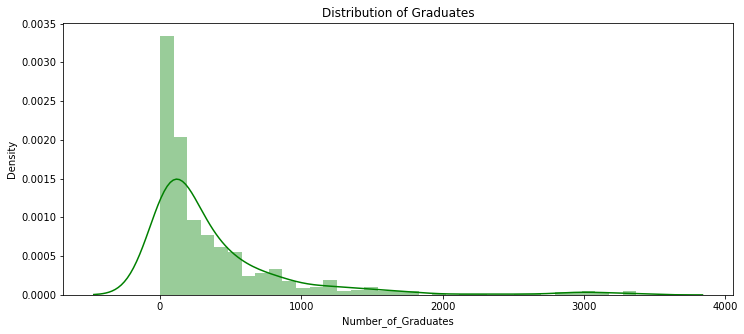

In [18]:
plt.figure(figsize = (12,5))
plt.title ('Distribution of Graduates')
ax = sns.distplot(data['Number_of_Graduates'], color = 'g')

In [19]:
## show percentage change in graduates yearly

# print (data['Number_of_Graduates'].pct_change()*100)
mean = data.mean()['Number_of_Graduates']
max = data.max()['Number_of_Graduates']
min = data.min()['Number_of_Graduates']


print(f'The mean numbers of Graduates = {mean}')
print(f'The max numbers of Graduates = {max}')
print(f'The min numbers of Graduates = {min}')

print (data.loc[data['Number_of_Graduates'].idxmax()])


The mean numbers of Graduates = 394.9866666666667
The max numbers of Graduates = 3371
The min numbers of Graduates = 0
year                                   2007
sex                                   Males
Type of Course         Engineering Sciences
Number_of_Graduates                    3371
Name: 433, dtype: object


/var/folders/zw/_1qwpyys3sdcfh1hm9x5r6wh0000gn/T/ipykernel_86127/2643795120.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data.mean()['Number_of_Graduates']


With the higest number of graduates graduating in 2007, we can see the hot course that students chose to study is Engineering Sciences and the majority of students is Males with 3371 students graduating from different universities.

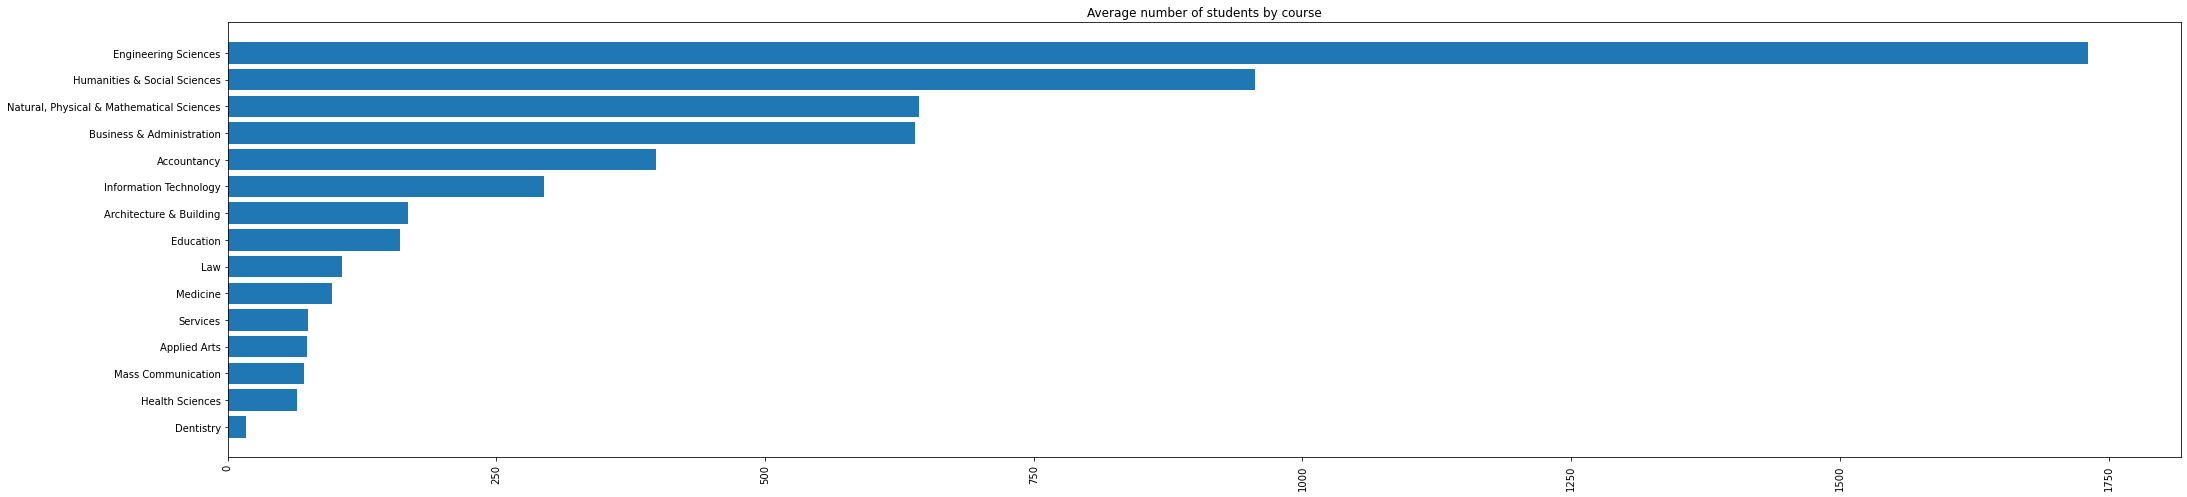

In [20]:
# Mean numbers of student of each course type
number_by_course = data.groupby('Type of Course').mean()['Number_of_Graduates']

# Sort by the values 
number_by_course = number_by_course.sort_values()

fig,ax = plt.subplots(figsize = (35,8))
plt.barh(number_by_course.index, number_by_course.values)
plt.xticks(rotation = 90)
plt.title ('Average number of students by course')
plt.show()

From the average graph, from 1993 to 2014, we can observe that engineering sciences course is the high demanding course with average of 1750 students among all universities and following by humanities & social sciences with an average of 1000 students and Natural, Physical & Mathematical Sciences with an average of 650 students.
**The top 5 degrees that most students graduated from :**
* Engineering Sciences
* Humanities & Social Sciences 
* Natural, Physical & Mathematical Sciences
* Business & Administration 
* Accountancy



# Importing graduate employment survey dataset

In [21]:
## Source: https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd
# downloaded as csv file by link provided in source website

df =pd.read_csv('graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv', encoding ='latin-1' )
df

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816
...,...,...,...,...,...,...,...,...,...,...,...,...
842,2019,Singapore University of Social Sciences,School of Business,Bachelor of Science in Marketing,88.3,70,2993,3000,3169,3000,2800,3400
843,2019,Singapore University of Technology and Design,na,Bachelor of Engineering (Engineering Product D...,84.2,80.2,3991,3900,4042,4000,3660,4500
844,2019,Singapore University of Technology and Design,na,Bachelor of Engineering (Information Systems T...,88.8,85.7,4599,4400,4636,4400,3800,5000
845,2019,Singapore University of Technology and Design,na,Bachelor of Engineering (Engineering Systems a...,89.9,87.3,3944,3800,4082,4000,3500,4400


In [22]:
df.dtypes

year                          int64
university                   object
school                       object
degree                       object
employment_rate_overall      object
employment_rate_ft_perm      object
basic_monthly_mean           object
basic_monthly_median         object
gross_monthly_mean           object
gross_monthly_median         object
gross_mthly_25_percentile    object
gross_mthly_75_percentile    object
dtype: object

In [23]:
# Before converting data type to numbers. We will drop null columns.
df = df.replace(['na'],None)
df


,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816
...,...,...,...,...,...,...,...,...,...,...,...,...
842,2019,Singapore University of Social Sciences,School of Business,Bachelor of Science in Marketing,88.3,70,2993,3000,3169,3000,2800,3400
843,2019,Singapore University of Technology and Design,None,Bachelor of Engineering (Engineering Product D...,84.2,80.2,3991,3900,4042,4000,3660,4500
844,2019,Singapore University of Technology and Design,None,Bachelor of Engineering (Information Systems T...,88.8,85.7,4599,4400,4636,4400,3800,5000
845,2019,Singapore University of Technology and Design,None,Bachelor of Engineering (Engineering Systems a...,89.9,87.3,3944,3800,4082,4000,3500,4400


In [24]:
df = df.dropna()
df

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816
...,...,...,...,...,...,...,...,...,...,...,...,...
838,2019,Singapore Management University,School of Law (4-year programme) *,Law (Cum Laude and above) #,98.6,97.1,5136,5000,5324,5550,4500,6000
839,2019,Singapore University of Social Sciences,S R Nathan School of Human Development,Bachelor of Human Resource Management,87.1,74.2,2942,3000,2975,3000,2800,3300
840,2019,Singapore University of Social Sciences,School of Business,Bachelor of Accountancy,91.1,83.3,2880,3000,2900,3000,2750,3000
841,2019,Singapore University of Social Sciences,School of Business,Bachelor of Science in Finance,88.6,88.6,3708,3400,3722,3450,3085,3750


In [25]:
# We will covert data from object to integer for some specific columns 

df['year'] = df['year'].apply(str)
df.employment_rate_overall = df.employment_rate_overall.astype(np.float64)
df.employment_rate_ft_perm = df.employment_rate_ft_perm.astype(np.float64)
df.basic_monthly_mean = df.basic_monthly_mean.astype(np.int64)
df.basic_monthly_median = df.basic_monthly_median.astype(np.int64)
df.gross_monthly_mean = df.gross_monthly_mean.astype(np.int64)
df.gross_monthly_median = df.gross_monthly_median.astype(np.int64)
df.gross_mthly_25_percentile = df.gross_mthly_25_percentile.astype(str).astype(int)
df.gross_mthly_75_percentile = df.gross_mthly_75_percentile.astype(str).astype(int)

/var/folders/zw/_1qwpyys3sdcfh1hm9x5r6wh0000gn/T/ipykernel_86127/3201977487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].apply(str)
/var/folders/zw/_1qwpyys3sdcfh1hm9x5r6wh0000gn/T/ipykernel_86127/3201977487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.employment_rate_overall = df.employment_rate_overall.astype(np.float64)
/var/folders/zw/_1qwpyys3sdcfh1hm9x5r6wh0000gn/T/ipykernel_86127/3201977487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [26]:
df.dtypes

year                          object
university                    object
school                        object
degree                        object
employment_rate_overall      float64
employment_rate_ft_perm      float64
basic_monthly_mean             int64
basic_monthly_median           int64
gross_monthly_mean             int64
gross_monthly_median           int64
gross_mthly_25_percentile      int64
gross_mthly_75_percentile      int64
dtype: object

In [27]:
df.describe()

,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,90.631402,82.633423,3452.783019,3334.989218,3564.960916,3425.768194,3123.742588,3850.867925
std,6.851265,13.419688,543.231738,492.846167,561.707518,532.650770,450.596288,678.611000
min,66.700000,14.300000,2000.000000,1750.000000,2100.000000,1800.000000,1500.000000,2500.000000
25%,86.200000,74.625000,3125.250000,3000.000000,3229.000000,3100.000000,2850.000000,3500.000000
50%,91.350000,85.400000,3336.500000,3250.000000,3457.500000,3300.000000,3000.000000,3700.000000
75%,96.200000,93.200000,3684.750000,3500.000000,3790.750000,3600.000000,3300.000000,4048.500000
max,100.000000,100.000000,6962.000000,5450.000000,7139.000000,5800.000000,5200.000000,9967.000000


# We will have a look through each column and analyse the pay for fresh graduates and which course has the most graduates.
## Dataset Description
* Employment rate Overall - this includes full-time, part-time, temporary or freelance basis
* Employrate rate full-time permanant - this refers to the number of graduates who work at least 35 hours a week and where the employment is not temporary in labour force.
* Basic Monthly Salary - Mean
* Basic Monthly Salary - Median
* Gross monthly Salary - Mean
* Gross monthly Salary - Median 
* Gross Monthly Salary - 25th Percentile
* Gross Monthly Salary - 75th Percentile

## Explotary Data Analysis

<AxesSubplot:>

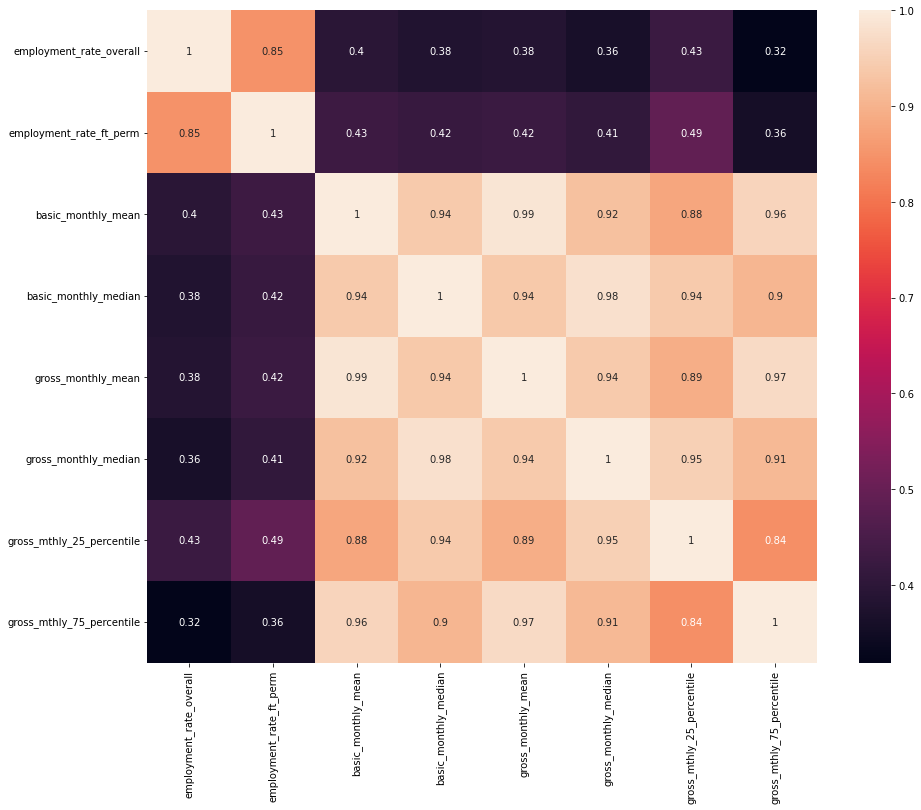

In [28]:
fig,ax = plt.subplots(figsize= (15,12))
sns.heatmap(df.corr(), annot = True)

In [29]:
df['degree'].unique()

array(['Accountancy and Business',
       'Accountancy (3-yr direct Honours Programme)',
       'Business (3-yr direct Honours Programme)',
       'Business and Computing', 'Aerospace Engineering',
       'Bioengineering', 'Chemical and Biomolecular Engineering',
       'Computer Engineering', 'Civil Engineering', 'Computer Science',
       'Electrical and Electronic Engineering',
       'Environmental Engineering', 'Information Engineering and Media',
       'Materials Engineering', 'Mechanical Engineering',
       'Maritime Studies', 'Art, Design & Media', 'Chinese',
       'Communication Studies', 'Economics', 'English',
       'Linguistics and Multilingual Studies', 'Psychology', 'Sociology',
       'Biomedical Sciences (Traditional Chinese Medicine) #',
       'Biological Sciences', 'Chemistry & Biological Chemistry',
       'Mathematical Science', 'Physics / Applied Physics',
       'Sports Science and Management', 'Science (with Education)',
       'Arts (with Education)', 'Bach

In [30]:
df['school'].unique()

array(['College of Business (Nanyang Business School)',
       'College of Engineering',
       'College of Humanities, Arts & Social Sciences',
       'College of Sciences', 'National Institute of Education (NIE)',
       'Faculty of Arts & Social Sciences', 'NUS Business School',
       'School of Computing', 'Faculty of Dentistry',
       'School of Design & Environment', 'Faculty of Engineering',
       'Faculty of Law', 'YLL School of Medicine', 'Faculty of Science',
       'School of Accountancy (4-years programme) *',
       'School of Business (4-years programme) *',
       'School of Economics (4-years programme) *',
       'School of Information Systems (4-years programme) *',
       'School of Social Sciences (4-years programme) *',
       'School of Law (4-years programme) *',
       'School of Accountancy (4-year programme) *',
       'School of Business (4-year programme) *',
       'School of Economics (4-year programme) *',
       'School of Information Systems (4-year 

degree
Bachelor of Science (Hons) in Chemistry & Biological Chemistry             70.1
Bachelor of Engineering (Hons) (Environmental Engineering)                 71.8
Bachelor of Engineering (Bioengineering)                                   74.0
Bachelor of Arts (Hons) in Public Policy And Global Affairs                74.1
Environmental Earth Systems Science ^                                      76.2
                                                                          ...  
Bachelor of Medicine And Bachelor Of Surgery #                            100.0
Arts (with Education)                                                     100.0
Bachelor of Medicine and Bachelor of Surgery (MBBS) #                     100.0
Medicine #                                                                100.0
Information Systems Management (4-years programme) Cum Laude and above    100.0
Name: employment_rate_overall, Length: 250, dtype: float64


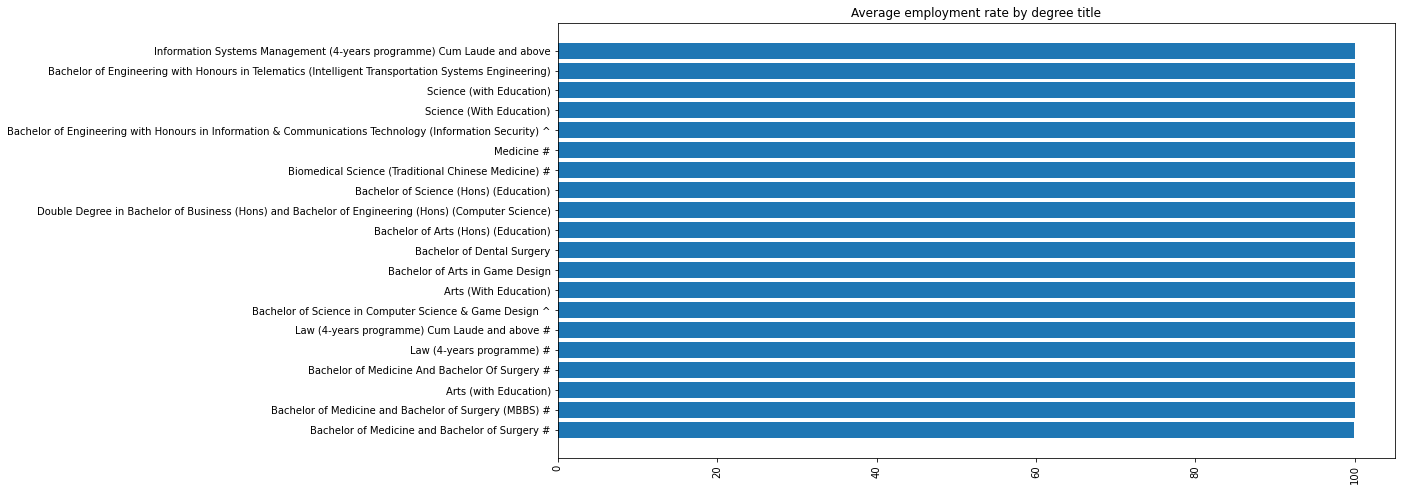

In [48]:
## Get mean percentage of employment rate overall in each degree.

grad_by_course = df.groupby('degree').mean()['employment_rate_overall'].sort_values()
print(grad_by_course)

# Sort by the values
grad_by_course = grad_by_course.sort_values()
# get the top 20 degree
grad_by_course = grad_by_course.tail(20)

fig, ax = plt.subplots(figsize = (15,8))
plt.barh(grad_by_course.index,grad_by_course.values)
plt.xticks(rotation = 90)
plt.title("Average employment rate by degree title")
plt.show()

/var/folders/zw/_1qwpyys3sdcfh1hm9x5r6wh0000gn/T/ipykernel_86127/2683078612.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(count_by_employment_rate.index, rotation=90)
/var/folders/zw/_1qwpyys3sdcfh1hm9x5r6wh0000gn/T/ipykernel_86127/2683078612.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(count_by_basic_pay.index, rotation=90)


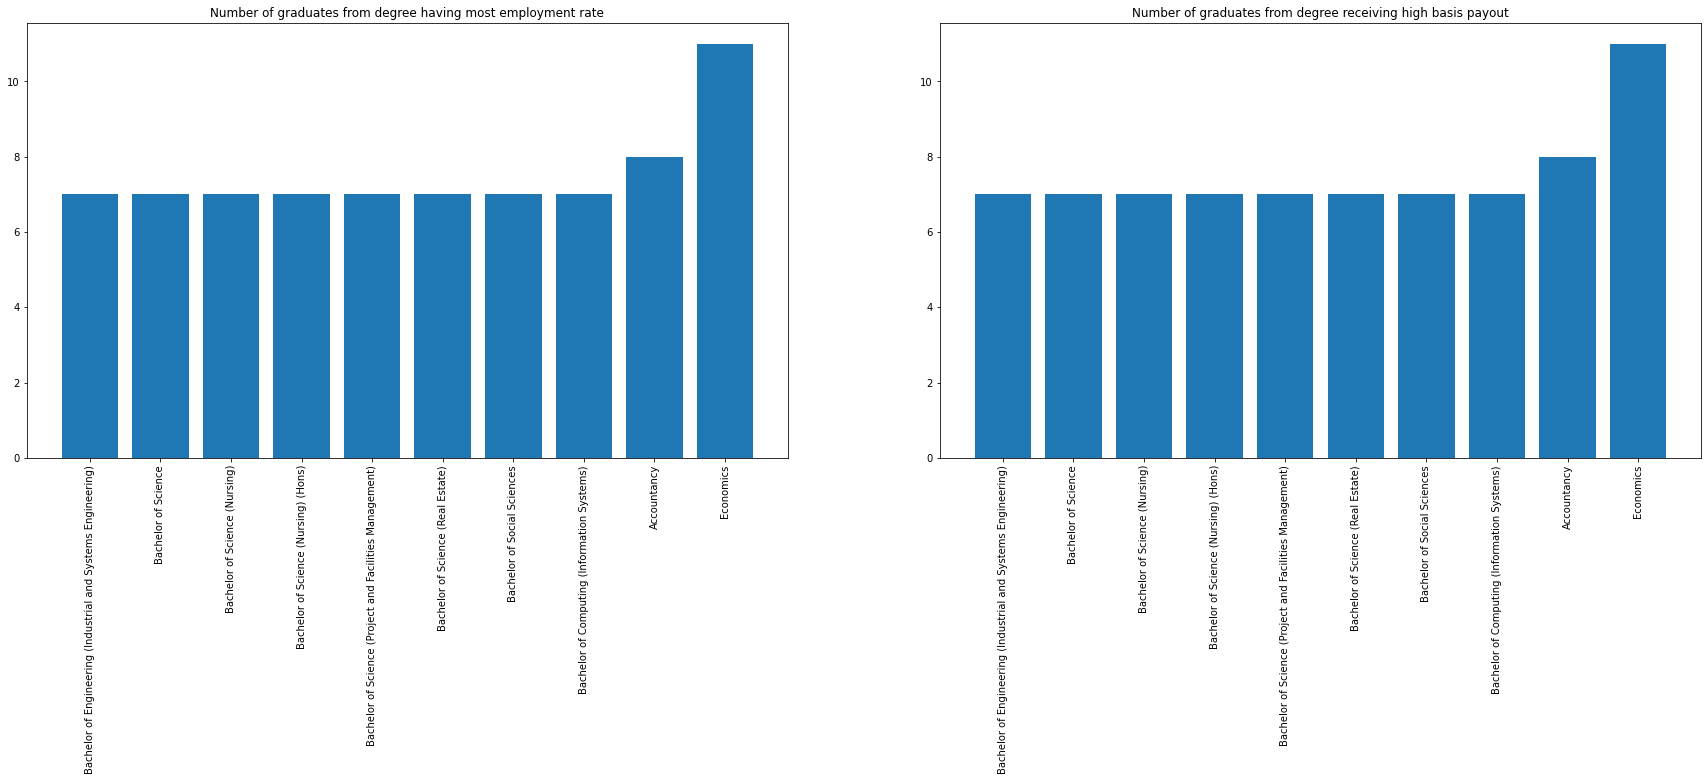

In [49]:
## What are the top 10 degree that are most hiring(high employment rate) and have the high basic monthly Salary? 

count_by_employment_rate = df.groupby('degree').count()['employment_rate_overall'].sort_values().tail(10)
count_by_basic_pay = df.groupby('degree').count()['basic_monthly_median'].sort_values().tail(10)

## visualize the result
fig,ax = plt.subplots(1,2,figsize = (30,8))
ax[0].bar(count_by_employment_rate.index, count_by_employment_rate.values)
ax[0].set_title('Number of graduates from degree having most employment rate')

ax[1].bar(count_by_basic_pay.index, count_by_basic_pay.values)
ax[1].set_title('Number of graduates from degree receiving high basis payout')

ax[0].set_xticklabels(count_by_employment_rate.index, rotation=90)
ax[1].set_xticklabels(count_by_basic_pay.index, rotation=90)

plt.show()

Thus, as you see, we have the top 10 degrees that have the high employment rate with high basic pay rate monthly.
* Bachelor of Engineering
* Bachelor of Science
* Bachelor of Science(Nursing)
* Bachelor of Science (Project and Facilities Management)
* Bachelor of Science (Real Estate)
* Bachelor of Social Sciences
* Bachelor of Computing(Information Systems)
* Accountancy
* Economics

degree
Bachelor of Medicine And Bachelor Of Surgery #    5000
Law (4-year programme) #                          5025
Bachelor of Laws (LLB) (Hons) #                   5150
Bachelor of Medicine and Bachelor of Surgery #    5237
Bachelor of Laws #                                5500
Law (4-years programme) Cum Laude and above #     5547
Law (Cum Laude and above) #                       5550
Law Cum Laude and above #                         5600
Medicine #                                        5700
Law (4-year programme) Cum Laude and above #      5800
Name: gross_monthly_median, dtype: int64


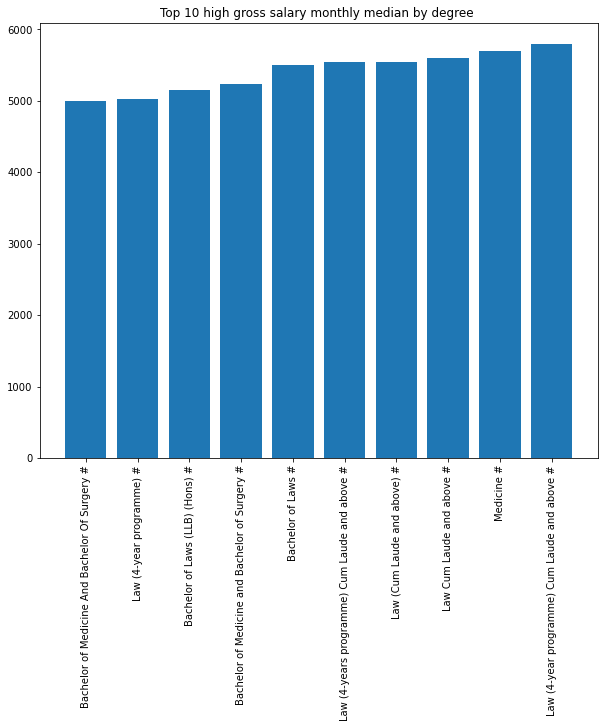

In [33]:
## Which course has high gross monthy salary?

highest_median_gross_salary = df.groupby('degree').max()['gross_monthly_median'].sort_values().tail(10)

print(highest_median_gross_salary)

fig,ax = plt.subplots(figsize = (10,8))
ax.bar(highest_median_gross_salary.index, highest_median_gross_salary)
plt.title('Top 10 high gross salary monthly median by degree ')
plt.xticks(rotation = 90)
plt.show()

#### Observance:

* In this above graph, we find the highest gross monthly salary by course. As we can see, fresh-graduates who were taking bachelor of Laws and related course are having high gross monthly salary after graduating. 
* Thus, a high-paying job as a doctor or lawyer has traditionally been the career path that many Singaporean aspire to. Furthermore, there are students with degrees in computer science joining the ranks of top earners.

university
Nanyang Technological University           88.116942
Singapore University of Social Sciences    90.828571
National University of Singapore           91.227160
Singapore Institute of Technology          91.459639
Singapore Management University            94.498810
Name: employment_rate_overall, dtype: float64


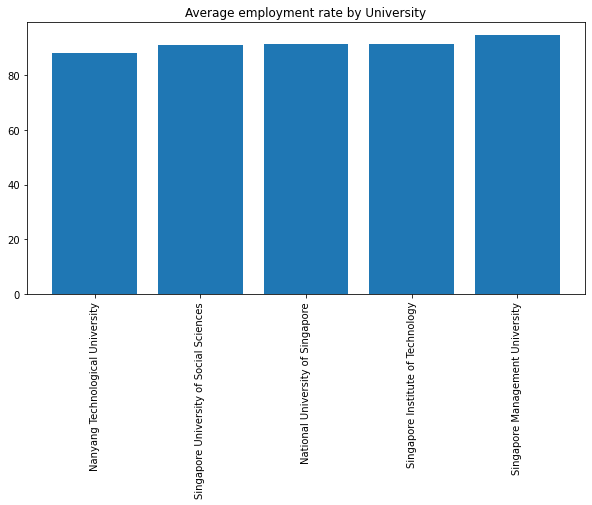

In [34]:
## Which university has high average employment rate?

count_by_school = df.groupby('university').mean()['employment_rate_overall'].sort_values().tail()

print (count_by_school)

fig,ax = plt.subplots(figsize = (10,5))
ax.bar(count_by_school.index, count_by_school)
plt.title('Average employment rate by University')
plt.xticks(rotation = 90)
plt.show()


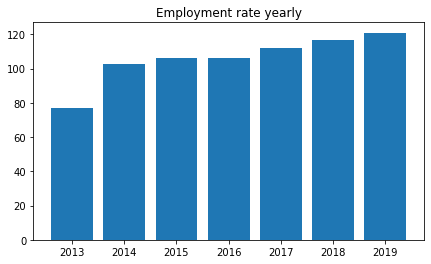

In [35]:
## Which year has low employment rate?

count_by_year = df.groupby('year').count()['employment_rate_overall'].sort_values()

fig,ax = plt.subplots(figsize = (7,4))
ax.bar(count_by_year.index, count_by_year)
plt.title('Employment rate yearly')
# plt.xticks(rotation = 90)
plt.show()


In [36]:
max_basic_pay_median = df.loc[df['basic_monthly_median'].idxmax()]
max_basic_pay_median

year                                                        2017
university                       Singapore Management University
school                       School of Law (4-years programme) *
degree                                 Law Cum Laude and above #
employment_rate_overall                                     97.9
employment_rate_ft_perm                                     97.9
basic_monthly_mean                                          5163
basic_monthly_median                                        5450
gross_monthly_mean                                          5287
gross_monthly_median                                        5600
gross_mthly_25_percentile                                   4200
gross_mthly_75_percentile                                   6000
Name: 535, dtype: object

#### From the graph above, we can observe that: 
* 2018 and 2019 are the two years that were having the highest employment rate as there might be more jobs created and high demand in finding fresh graduates in different industry.
* Singapore Management of University(SMU) has the highest average employment rate of fresh-graduates and following by Singapore Insititute of Technology(SIT) and National University of Singapore(NUS).

/var/folders/zw/_1qwpyys3sdcfh1hm9x5r6wh0000gn/T/ipykernel_86127/1814315412.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(gross_monthly_25th.index, rotation=90)
/var/folders/zw/_1qwpyys3sdcfh1hm9x5r6wh0000gn/T/ipykernel_86127/1814315412.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(gross_monthly_75th.index, rotation=90)


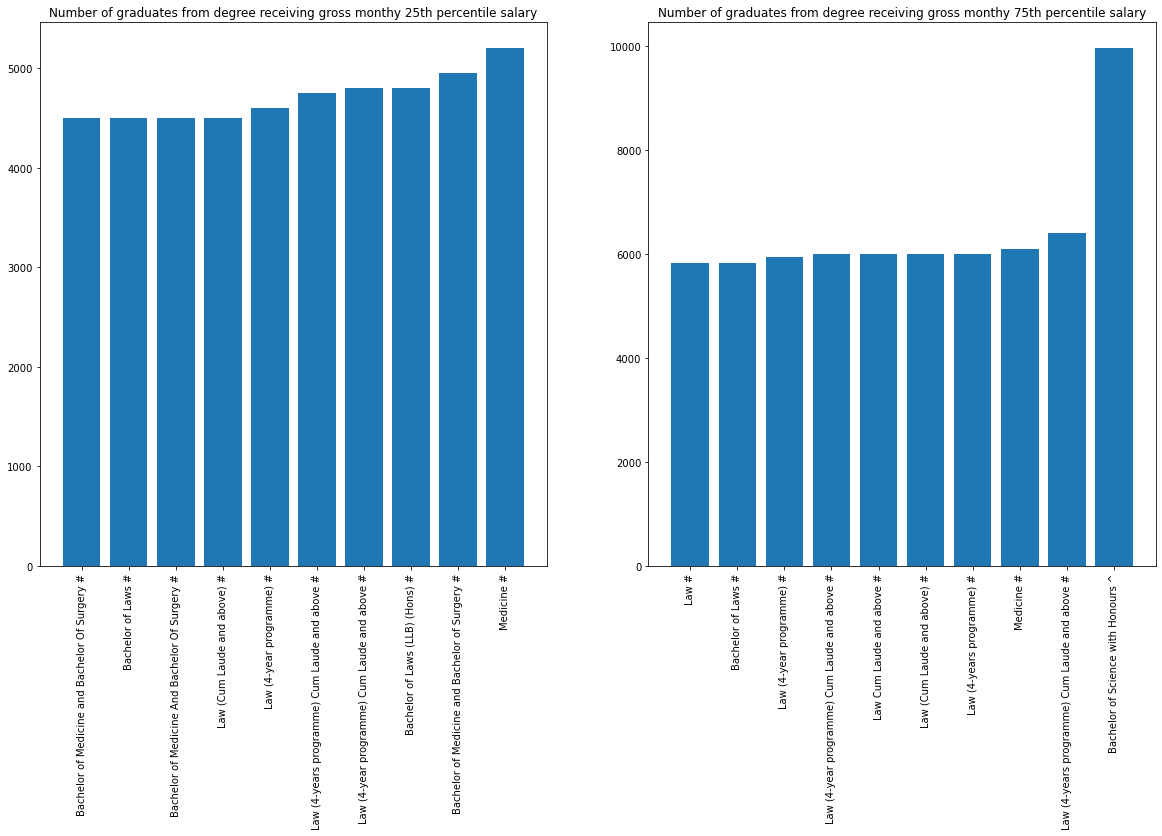

In [37]:
## Number of fresh graduates from degree receiving gross monthly 25th and 75th percentile salary  

gross_monthly_25th = df.groupby('degree').max()['gross_mthly_25_percentile'].sort_values().tail(10)
gross_monthly_75th = df.groupby('degree').max()['gross_mthly_75_percentile'].sort_values().tail(10)

## visualize the result
fig,ax = plt.subplots(1,2,figsize = (20,10))
ax[0].bar(gross_monthly_25th.index, gross_monthly_25th.values)
ax[0].set_title('Number of graduates from degree receiving gross monthy 25th percentile salary')

ax[1].bar(gross_monthly_75th.index, gross_monthly_75th.values)
ax[1].set_title('Number of graduates from degree receiving gross monthy 75th percentile salary')

ax[0].set_xticklabels(gross_monthly_25th.index, rotation=90)
ax[1].set_xticklabels(gross_monthly_75th.index, rotation=90)

plt.show()


/var/folders/zw/_1qwpyys3sdcfh1hm9x5r6wh0000gn/T/ipykernel_86127/2659010557.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(gross_monthly_25th_byschool.index, rotation=90)
/var/folders/zw/_1qwpyys3sdcfh1hm9x5r6wh0000gn/T/ipykernel_86127/2659010557.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(gross_monthly_75th_byschool.index, rotation=90)


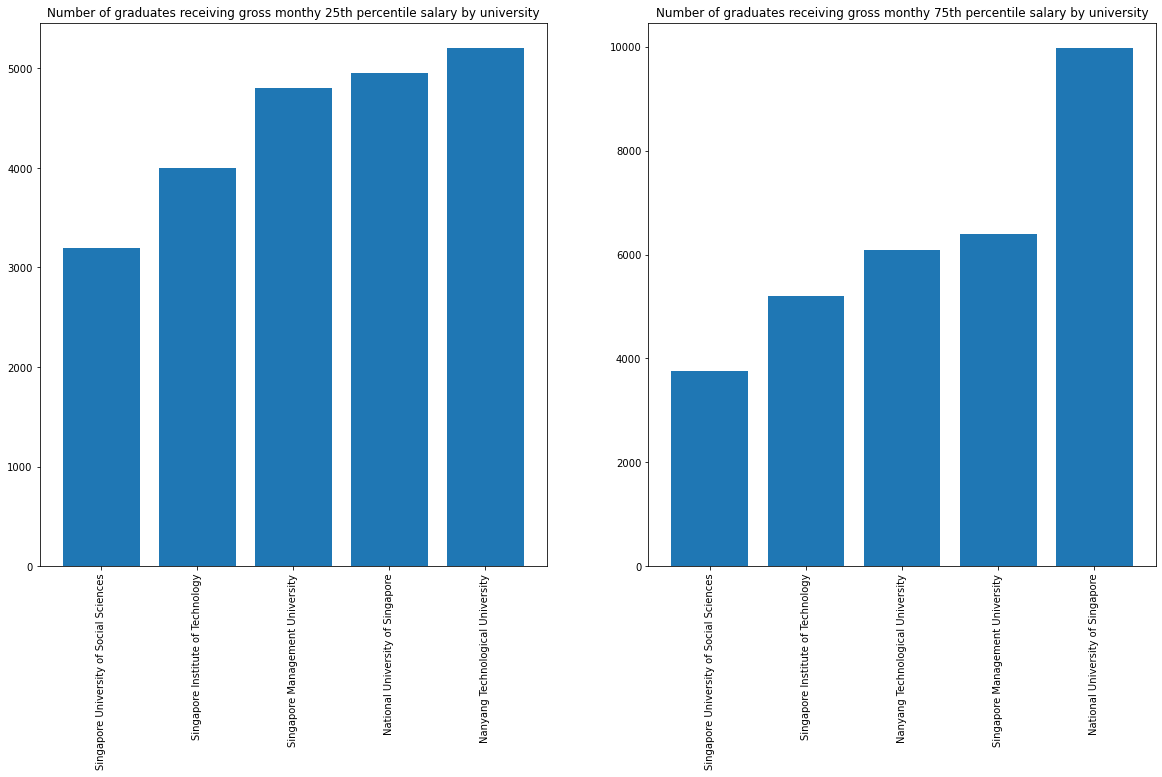

In [38]:
## Number of fresh graduates receiving gross monthly 25th and 75th percentile salary differenciate by university

gross_monthly_25th_byschool = df.groupby('university').max()['gross_mthly_25_percentile'].sort_values().tail()
gross_monthly_75th_byschool = df.groupby('university').max()['gross_mthly_75_percentile'].sort_values().tail()

## visualize the result
fig,ax = plt.subplots(1,2,figsize = (20,10))
ax[0].bar(gross_monthly_25th_byschool.index, gross_monthly_25th_byschool.values)
ax[0].set_title('Number of graduates receiving gross monthy 25th percentile salary by university')

ax[1].bar(gross_monthly_75th_byschool.index, gross_monthly_75th_byschool.values)
ax[1].set_title('Number of graduates receiving gross monthy 75th percentile salary by university')

ax[0].set_xticklabels(gross_monthly_25th_byschool.index, rotation=90)
ax[1].set_xticklabels(gross_monthly_75th_byschool.index, rotation=90)

plt.show()

## Ethics of use of data:

Web-scrapped dataset source: https://data.gov.sg/dataset/graduates-from-university-first-degree-courses-by-type-of-course?view_id=fa0e401c-6251-4a15-aebc-a5f3d2c85752&resource_id=eb8b932c-503c-41e7-b513-114cffbe2338

This dataset is accurate as it was taken from a trusted website. The columns in the data frames are provided accordingly hence comprehension of these data would be accessible.

This dataset is extracted from Singapore Government Dataset so that the data manipulation is done clearly for the users who inspect the code and the code could be implemented and analysed easily. 


## Evaluation:

* The employment rate for fresh graduates in Singapore is getting higher and more stable over years.
* In the first dataset, it's obvious that from 1993 to 2004, most fresh graduates were from Engineering Science course and majority is Male students with the double number compared to students from Humanities & Social Sciences in year 2007.
* In the second dataset, we analyse from year 2013 to 2019, those high-paying jobs are lawyer, doctors and software engineers. 
* In 2017, fresh graduates from Singapore Management University's Law Cum Laude and above commanded a median salary of up to S\\$5,000 SGD and above. They were also in demand with employers, ad they recorded a 97 per cent overall employment rate.
* Futhermore, according to the graph, Singapore Management University has the highest overall employment rate yearly compared to Nanyang Technology University  and National University of Singapore.
* Rankings differed for 75th percentile salaries - the salary of the top 25 per cent of the batch - NTU-schooled fresh graduates emerged as top earners at around S\\$5,000 and above. 
* Growth of salaries for fresh graduates in medicine and law, otherwise, as fresh graduates from NUS and SMU, they only received about S\\$100 and S\\$200 different in salary.
* A high-paying jobs such as lawyer and doctor have been aspired Singaporean undergraduates to choose for their career paths over years. Hence, nowadays, technology is about to move faster and faster in our future as everything is going to be digitalised so those students in Computer Science industry are in high demand of recruiting and have been joining the top earners in singapore and around the world. 


## Reference:

**Datasource:**
- Graduates from university first degree course by type of course: 
https://data.gov.sg/dataset/graduates-from-university-first-degree-courses-by-type-of-course?view_id=fa0e401c-6251-4a15-aebc-a5f3d2c85752&resource_id=eb8b932c-503c-41e7-b513-114cffbe2338

- Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD:
https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd